<a href="https://colab.research.google.com/github/catmalark/Tensorflow-My-Practices/blob/main/citrus_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import random
import shutil
from shutil import copyfile
import os 

In [2]:
!wget https://data.mendeley.com/public-files/datasets/3f83gxmv57/files/53398b67-6f0e-4a67-8384-e2b574b2ebf4/file_downloaded \
    -O "/tmp/citrus_leaves.zip"

--2022-04-22 12:57:48--  https://data.mendeley.com/public-files/datasets/3f83gxmv57/files/53398b67-6f0e-4a67-8384-e2b574b2ebf4/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/ad404a4d-cedf-4830-8a11-0fc204ce8acb [following]
--2022-04-22 12:57:49--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/ad404a4d-cedf-4830-8a11-0fc204ce8acb
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.101.192
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.101.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66977095 (64M) [applicati

In [3]:
import zipfile

# Unzip the dataset
local_zip = '/tmp/citrus_leaves.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Define root directory
root_dir = '/tmp/citrus_fruits'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)


def create_train_test_dirs(root_path):
  os.makedirs(root_path)
  subdir = os.path.join(root_path, "training/black_spot") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "training/canker") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "training/greening") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "training/scab") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "training/healthy") 
  os.makedirs(subdir)
  
  subdir = os.path.join(root_path, "testing/black_spot") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "testing/canker") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "testing/greening") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "testing/scab") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "testing/healthy") 
  os.makedirs(subdir)
  pass
   
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Now spliting data into train and validation 

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  source = os.listdir(SOURCE)
  source = random.sample(source, len(source))

  training_size = int(SPLIT_SIZE * (len(source)))
  
  for i in source[0:training_size]:
    im_path = os.path.join(SOURCE, "{0}".format(i))
    if os.path.getsize(im_path) == 0:
      print("{0} is zero length, so ignoring".format(i))
    else:
      copyfile(im_path, TRAINING + i)
  for j in source[training_size:len(source)]:
    im_path = os.path.join(SOURCE, "{0}".format(j))
    if os.path.getsize(im_path) == 0:
      print("{0} is zero length, so ignoring".format(j))
    else:
      copyfile(im_path, TESTING + j) 
  pass

In [6]:
# Define paths
black_spot_SOURCE_DIR = "/tmp/Citrus/Fruits/Black spot"
canker_SOURCE_DIR = "/tmp/Citrus/Fruits/Canker"
greening_SOURCE_DIR = "/tmp/Citrus/Fruits/Greening"
scab_SOURCE_DIR = "/tmp/Citrus/Fruits/Scab"
healthy_SOURCE_DIR = "/tmp/Citrus/Fruits/healthy"

TRAINING_DIR = "/tmp/citrus_fruits/training"
TESTING_DIR = "/tmp/citrus_fruits/testing"

TRAINING_black_spot_DIR = os.path.join(TRAINING_DIR, "black_spot/")
TESTING_black_spot_DIR = os.path.join(TESTING_DIR, "black_spot/")

TRAINING_canker_DIR = os.path.join(TRAINING_DIR, "canker/")
TESTING_canker_DIR = os.path.join(TESTING_DIR, "canker/")

TRAINING_greening_DIR = os.path.join(TRAINING_DIR, "greening/")
TESTING_greening_DIR = os.path.join(TESTING_DIR, "greening/")

TRAINING_scab_DIR = os.path.join(TRAINING_DIR, "scab/")
TESTING_scab_DIR = os.path.join(TESTING_DIR, "scab/")

TRAINING_healthy_DIR = os.path.join(TRAINING_DIR, "healthy/")
TESTING_healthy_DIR = os.path.join(TESTING_DIR, "healthy/")

# Define proportion of images used for training
split_size = .9

# Run the function
split_data(black_spot_SOURCE_DIR, TRAINING_black_spot_DIR, TESTING_black_spot_DIR, split_size)
split_data(canker_SOURCE_DIR, TRAINING_canker_DIR, TESTING_canker_DIR, split_size)
split_data(greening_SOURCE_DIR, TRAINING_greening_DIR, TESTING_greening_DIR, split_size)
split_data(scab_SOURCE_DIR, TRAINING_scab_DIR, TESTING_scab_DIR, split_size)
split_data(healthy_SOURCE_DIR, TRAINING_healthy_DIR, TESTING_healthy_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_black_spot_DIR))} images of black_spots for training")
print(f"There are {len(os.listdir(TESTING_black_spot_DIR))} images of black_spots for testing")
print(f"There are {len(os.listdir(TRAINING_canker_DIR))} images of cankers for training")
print(f"There are {len(os.listdir(TESTING_canker_DIR))} images of cankers for testing")
print(f"There are {len(os.listdir(TRAINING_greening_DIR))} images of greening for training")
print(f"There are {len(os.listdir(TESTING_greening_DIR))} images of greening for testing")
print(f"There are {len(os.listdir(TRAINING_scab_DIR))} images of scab for training")
print(f"There are {len(os.listdir(TESTING_scab_DIR))} images of scab for testing")
print(f"There are {len(os.listdir(TRAINING_healthy_DIR))} images of healthy for training")
print(f"There are {len(os.listdir(TESTING_healthy_DIR))} images of healthy for testing")



There are 17 images of black_spots for training
There are 2 images of black_spots for testing
There are 70 images of cankers for training
There are 8 images of cankers for testing
There are 14 images of greening for training
There are 2 images of greening for testing
There are 13 images of scab for training
There are 2 images of scab for testing
There are 19 images of healthy for training
There are 3 images of healthy for testing


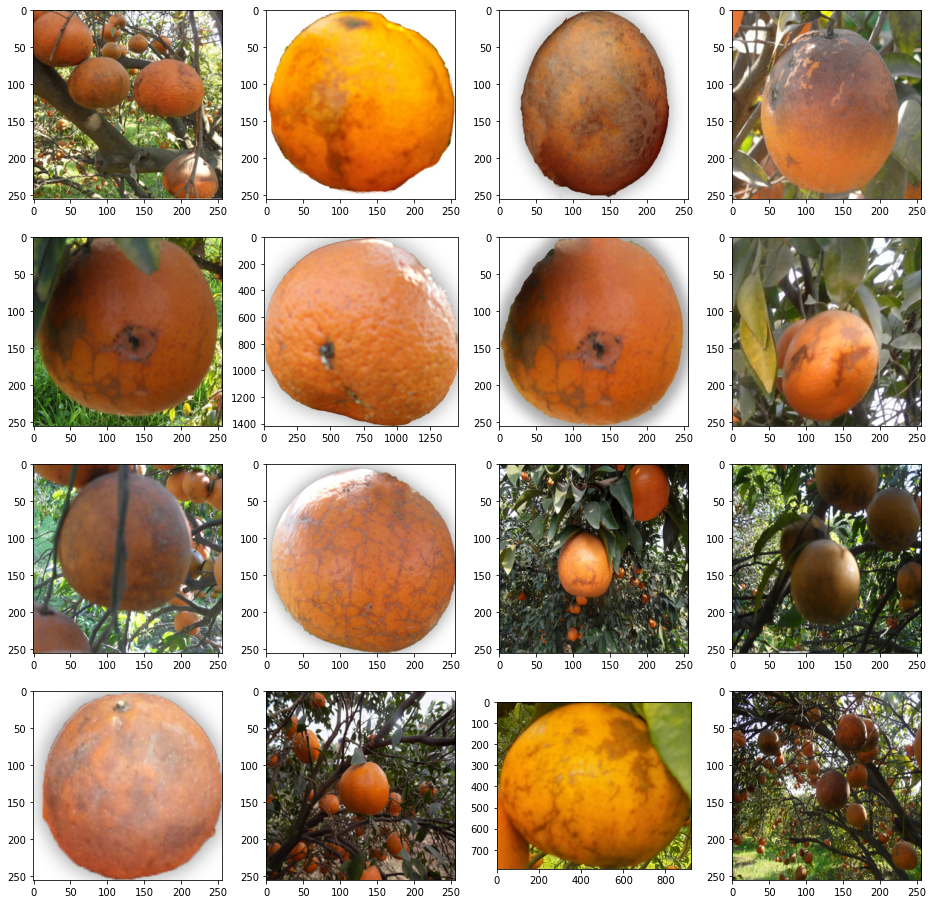

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(TRAINING_black_spot_DIR, fname) 
                for fname in os.listdir(TRAINING_black_spot_DIR)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(TRAINING_canker_DIR, fname) 
                for fname in os.listdir(TRAINING_canker_DIR)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
from keras.preprocessing.image import img_to_array, load_img

# Load the first example of a horse
sample_image  = load_img(f"{os.path.join(TRAINING_black_spot_DIR, os.listdir(TRAINING_black_spot_DIR)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (256, 256, 3)


In [9]:
#Pre Proccesing
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=60,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode="categorical",
                                                      target_size=(256, 256))


validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR,
                                                                batch_size=128,
                                                                class_mode="categorical",
                                                                target_size=(256, 256))

Found 133 images belonging to 5 classes.
Found 17 images belonging to 5 classes.


In [10]:
from keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
                                  include_top = False, 
                                  weights = "imagenet") 

for layer in pre_trained_model.layers: #Making all layers untrainable
    layer.trainable = False

In [11]:
last_layer = pre_trained_model.get_layer('mixed7')      #making the last layer mixed 7 which is 7x7 conv
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [22]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs=pre_trained_model.input, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
#Callback Function
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') >= 0.999: 
                print("\nReached 99.9% accuracy so cancelling training!") 
                self.model.stop_training = True

In [23]:
callbacks = myCallback()

history = model.fit(
      train_generator,
      epochs=30,
      verbose=1,
      validation_data = validation_generator,    
      callbacks=[callbacks],
      )

Epoch 1/30
2/2 [==============================] - 7s 4s/step - loss: 2.6973 - accuracy: 0.1203 - val_loss: 4.4615 - val_accuracy: 0.4706
Epoch 2/30
2/2 [==============================] - 3s 333ms/step - loss: 4.2571 - accuracy: 0.5113 - val_loss: 1.6929 - val_accuracy: 0.4118
Epoch 3/30
2/2 [==============================] - 3s 3s/step - loss: 2.0469 - accuracy: 0.4586 - val_loss: 1.4668 - val_accuracy: 0.5882
Epoch 4/30
2/2 [==============================] - 3s 3s/step - loss: 1.2872 - accuracy: 0.5789 - val_loss: 1.1361 - val_accuracy: 0.5882
Epoch 5/30
2/2 [==============================] - 3s 3s/step - loss: 1.0997 - accuracy: 0.6165 - val_loss: 1.1965 - val_accuracy: 0.4706
Epoch 6/30
2/2 [==============================] - 3s 3s/step - loss: 1.3496 - accuracy: 0.5489 - val_loss: 1.0778 - val_accuracy: 0.5294
Epoch 7/30
2/2 [==============================] - 3s 3s/step - loss: 1.0345 - accuracy: 0.6316 - val_loss: 1.0965 - val_accuracy: 0.5882
Epoch 8/30
2/2 [======================

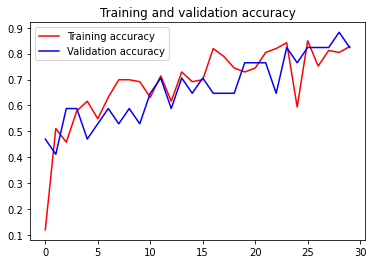

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#Creating image upload folder
os.makedirs("/tmp/images")

In [28]:
#Now upload and predict your image
from keras.preprocessing import image
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
  print()
  # predicting images
  path = '/tmp/images/' + i
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if np.argmax(classes) == 0:
    print(i + " is a black_spot")
  elif np.argmax(classes) == 1:
    print(i + " is a canker")
  elif np.argmax(classes) == 2:
    print(i + " is a greening")
  elif np.argmax(classes) == 3:
    print(i + " is a healthy")
  elif np.argmax(classes) == 4:
    print(i + " is a scab")

['oranges-g42a3f0bb6_640.jpg', 'IMG_2120.jpg', 'IMG_2121.jpg', 'orange-gc7d64ed40_640.jpg', 'fruit-g13406903b_640.png']

[0.88526994 0.07030531 0.01283743 0.02163379 0.0099536 ]
oranges-g42a3f0bb6_640.jpg is a black_spot

[0.04118056 0.39825714 0.11778791 0.4368527  0.00592181]
IMG_2120.jpg is a healthy

[0.18540971 0.5313287  0.11486048 0.16011444 0.00828673]
IMG_2121.jpg is a canker

[1.7206801e-02 9.5339644e-01 2.0403670e-02 8.2260510e-03 7.6702546e-04]
orange-gc7d64ed40_640.jpg is a canker

[0.3925877  0.39557663 0.00446631 0.20266627 0.00470313]
fruit-g13406903b_640.png is a canker
